In [1]:
# Import all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('whitegrid')

In [2]:
# Load the raw data
raw_data = pd.read_csv('UK_monthly_gdp.csv')
raw_data.head()

,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2


In [3]:
# Info of the raw data
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time Period  36 non-null     object 
 1   GDP Growth   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 708.0+ bytes


In [4]:
# Describing the raw data
raw_data.describe()

,GDP Growth
count,36.000000
mean,0.072222
std,4.392631
min,-20.900000
25%,-0.200000
50%,0.300000
75%,1.025000
max,9.000000


In [5]:
# Convert monthly data to quarterly data using resample method
raw_data['Time Period'] = pd.to_datetime(raw_data['Time Period'], format='/%m/%Y')
raw_data.set_index('Time Period', inplace=True)
quarter_data = raw_data.resample('Q').mean()
print(quarter_data.head())

             GDP Growth
Time Period            
2020-03-31    -2.400000
2020-06-30    -2.900000
2020-09-30     3.500000
2020-12-31     0.200000
2021-03-31     0.033333


(array([18383., 18506., 18628., 18748., 18871., 18993., 19113., 19236.,
        19358.]),
 [Text(18383.0, 0, '2020-05'),
  Text(18506.0, 0, '2020-09'),
  Text(18628.0, 0, '2021-01'),
  Text(18748.0, 0, '2021-05'),
  Text(18871.0, 0, '2021-09'),
  Text(18993.0, 0, '2022-01'),
  Text(19113.0, 0, '2022-05'),
  Text(19236.0, 0, '2022-09'),
  Text(19358.0, 0, '2023-01')])

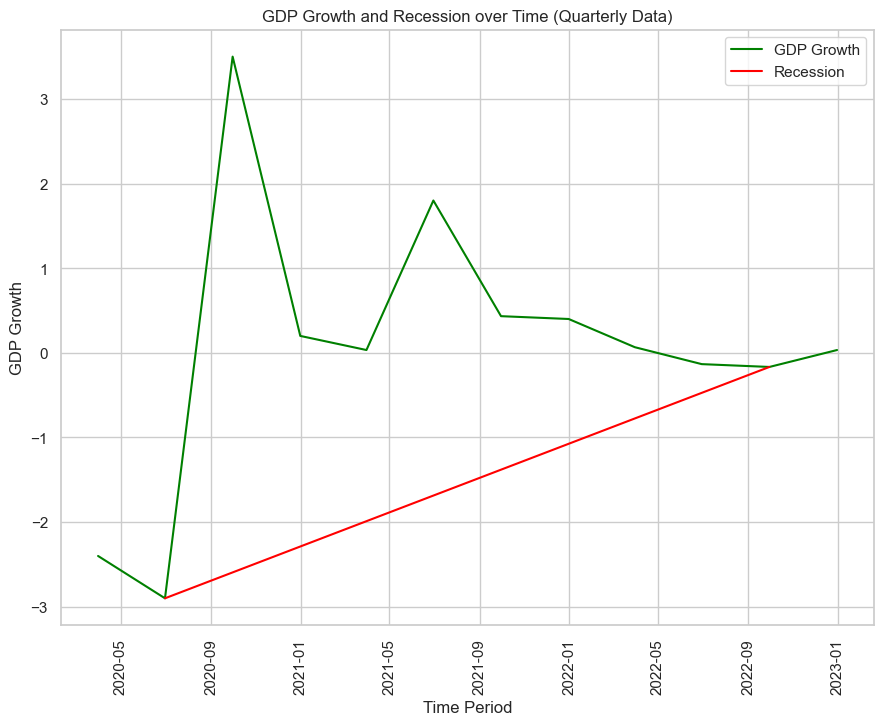

In [6]:
# Calculate recession based on quarterly GDP growth
quarter_data['Recession'] = ((quarter_data['GDP Growth'] < 0) & (quarter_data['GDP Growth'].shift(1) < 0))

# Fill missing values with False (since the first quarter cannot be in a recession)
quarter_data['Recession'].fillna(False, inplace=True)

# Plot the GDP growth and recession data
fig, ax = plt.subplots(figsize=[9, 7])
ax.plot(quarter_data['GDP Growth'], color='green', label = 'GDP Growth')
ax.plot(quarter_data[quarter_data['Recession']]['GDP Growth'], color='red', label = 'Recession')
ax.set_title('GDP Growth and Recession over Time (Quarterly Data)')
ax.set_xlabel('Time Period')
ax.set_ylabel('GDP Growth')
plt.legend()
fig.tight_layout()
plt.xticks(rotation = 'vertical')



The red line shows the periods of negative GDP growth (considered recessions), and the green line shows the overall trend in GDP growth over time.

In [7]:
# Calculating the cumulative sum
quarter_data['Recession start'] = quarter_data['Recession'].ne(quarter_data['Recession'].shift()).cumsum()

In [8]:
recession_periods = quarter_data.groupby('Recession start')


In [9]:
recession_duration = recession_periods.size()

In [10]:
recession_severity = recession_periods['GDP Growth'].sum()

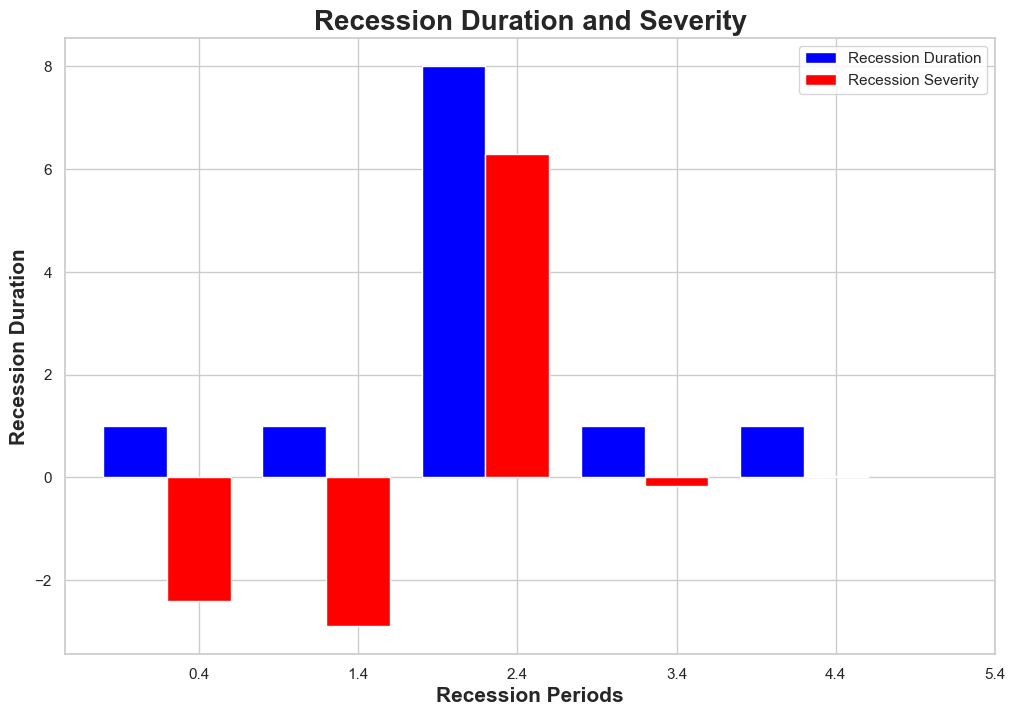

In [11]:
# Plotting the duration and severity of recession
barWidth = 0.4
fig ,ax = plt.subplots(figsize = (12,8))
br1 = np.arange(len(recession_duration.index))
br2 = [x + barWidth for x in br1]
ax.bar(br1 , recession_duration , width = barWidth , color='blue', label = 'Recession Duration')
ax.bar(br2 , recession_severity , width = barWidth , color='red', label = 'Recession Severity')
plt.xticks([r + barWidth for r in range(6)])
ax.set_title('Recession Duration and Severity', fontweight ='bold', fontsize = 20)
ax.set_xlabel('Recession Periods', fontweight ='bold', fontsize = 15)
ax.set_ylabel('Recession Duration', fontweight ='bold', fontsize = 15)
plt.legend()
